<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Let's-take-a-look-at-a-breakdown-of-the-target-var." data-toc-modified-id="Let's-take-a-look-at-a-breakdown-of-the-target-var.-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Let's take a look at a breakdown of the target var.</a></span></li></ul></li><li><span><a href="#OHE-Data" data-toc-modified-id="OHE-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>OHE Data</a></span></li></ul></li><li><span><a href="#Try-some-basic-models" data-toc-modified-id="Try-some-basic-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Try some basic models</a></span><ul class="toc-item"><li><span><a href="#First-lets-split-the-data" data-toc-modified-id="First-lets-split-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First lets split the data</a></span></li><li><span><a href="#Dummy-Model" data-toc-modified-id="Dummy-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dummy Model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li></ul></div>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, roc_auc_score
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

Data Source: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download

Things to do: 

- Do some plotting in EDA to make it prettier
- Format the EDA portion to make it prettier
- Check business understanding to ensure modeling needs are being met
- Put Function in a functions doc to make it prettier

# The Data

Taking a look at the data.

In [2]:
df = pd.read_csv('./Data/Hotel Reservations.csv')

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

No null values, variety of int and str cols. Lets take a look at the strings.

In [6]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [7]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [8]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

### Let's take a look at a breakdown of the target var.

In [9]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

Lets recode these to numerical values.

- 0 for not_canceled
- 1 for canceled

In [10]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled':0, 'Canceled':1})

In [11]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


## OHE Data

These are all categorical and will be very easy to OHE. Lets go ahead and do that real quick.

In [12]:
ohe = OneHotEncoder(sparse=False)

In [13]:
cat_cols = df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']]

In [14]:
ohe_transformed = ohe.fit_transform(cat_cols)

In [15]:
cols = ohe.get_feature_names()
cols

array(['x0_Meal Plan 1', 'x0_Meal Plan 2', 'x0_Meal Plan 3',
       'x0_Not Selected', 'x1_Room_Type 1', 'x1_Room_Type 2',
       'x1_Room_Type 3', 'x1_Room_Type 4', 'x1_Room_Type 5',
       'x1_Room_Type 6', 'x1_Room_Type 7', 'x2_Aviation',
       'x2_Complementary', 'x2_Corporate', 'x2_Offline', 'x2_Online'],
      dtype=object)

In [16]:
ohe_df = pd.DataFrame(ohe_transformed, columns=cols)

In [17]:
ohe_df

,x0_Meal Plan 1,x0_Meal Plan 2,x0_Meal Plan 3,x0_Not Selected,x1_Room_Type 1,x1_Room_Type 2,x1_Room_Type 3,x1_Room_Type 4,x1_Room_Type 5,x1_Room_Type 6,x1_Room_Type 7,x2_Aviation,x2_Complementary,x2_Corporate,x2_Offline,x2_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
full_df = pd.concat([df.drop(cat_cols, axis=1), ohe_df], axis=1)

In [19]:
full_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,x1_Room_Type 3,x1_Room_Type 4,x1_Room_Type 5,x1_Room_Type 6,x1_Room_Type 7,x2_Aviation,x2_Complementary,x2_Corporate,x2_Offline,x2_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36271,INN36272,2,0,1,3,0,228,2018,10,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36272,INN36273,2,0,2,6,0,148,2018,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36273,INN36274,2,0,0,3,0,63,2018,4,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

# Try some basic models

## First lets split the data

In [21]:
X = full_df.drop(['Booking_ID', 'booking_status'], axis=1)
y = full_df['booking_status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Dummy Model

In [23]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)

In [24]:
dummy_model.fit(X_train, y_train);

In [25]:
dummy_model.score(X_test, y_test)

0.6663358694453633

In [26]:
y_test.value_counts(normalize=True)

0    0.666336
1    0.333664
Name: booking_status, dtype: float64

OK, dummy model is predicting as expected. Let's try some other models.

## Logistic Regression

In [27]:
log_reg = LogisticRegression(random_state=42)

In [28]:
log_reg.fit(X_train, y_train)

C:\Users\nacnu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
log_reg.score(X_test, y_test)

0.798213695004962

In [30]:
y_pred = log_reg.predict(X_test)

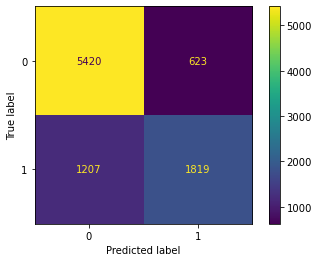

In [31]:
plot_confusion_matrix(log_reg, X_test, y_test)

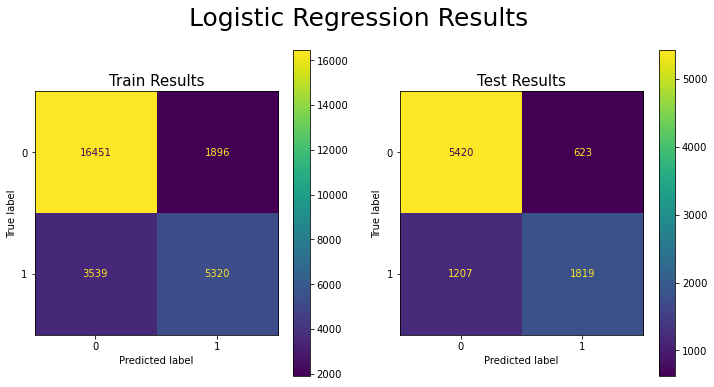

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

plot_confusion_matrix(log_reg, X_train, y_train, ax=ax[0])
ax[0].set_title('Train Results', size=15)


plot_confusion_matrix(log_reg, X_test, y_test, ax=ax[1])
ax[1].set_title('Test Results', size=15)

fig.suptitle('Logistic Regression Results', size=25);

train_scores = classification_report(y_train, log_reg.predict(X_train))
test_scores = classification_report(y_test, log_reg.predict(X_test))

In [33]:
print(test_scores)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6043
           1       0.74      0.60      0.67      3026

    accuracy                           0.80      9069
   macro avg       0.78      0.75      0.76      9069
weighted avg       0.79      0.80      0.79      9069



In [34]:
print(train_scores)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     18347
           1       0.74      0.60      0.66      8859

    accuracy                           0.80     27206
   macro avg       0.78      0.75      0.76     27206
weighted avg       0.80      0.80      0.79     27206



In [35]:
# Making a function to automate results
def score_model(model, 
                model_name, 
                X_train=X_train, 
                X_test=X_test, 
                y_train=y_train, 
                y_test=y_test,
                normalize=None):
    
    '''
    Input an sklearn model and model name (string).
    Returns a Confusion Matrix and classification Reports for
    train and test sets.    
    '''
    
    #Check if model is already fit
    try:
        check_is_fitted(model)
        fit = True
    except:
        fit = False
    
    #fit the model
    if fit == False:
        model.fit(X_train, y_train)
    
    # setting up the plot
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    fig.suptitle(f'{model_name} Results', size=25)
    
    
    #Train Confusion Matrix
    plot_confusion_matrix(model, 
                          X_train, 
                          y_train, 
                          ax=ax[0], 
                          normalize=normalize)
    ax[0].set_title('Train Results', size=15)

    # Test Confusion Matrix
    plot_confusion_matrix(model, 
                          X_test, 
                          y_test, 
                          ax=ax[1],
                          normalize=normalize)
    ax[1].set_title('Test Results', size=15)


    # Classification Reports
    # Train
    train_scores = classification_report(y_train, model.predict(X_train))
    print('Train Report:\n')
    print(train_scores)
    
    # Test
    test_scores = classification_report(y_test, model.predict(X_test))
    print('Test Report:\n')
    print(test_scores)

Train Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     18347
           1       0.74      0.60      0.66      8859

    accuracy                           0.80     27206
   macro avg       0.78      0.75      0.76     27206
weighted avg       0.80      0.80      0.79     27206

Test Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6043
           1       0.74      0.60      0.67      3026

    accuracy                           0.80      9069
   macro avg       0.78      0.75      0.76      9069
weighted avg       0.79      0.80      0.79      9069



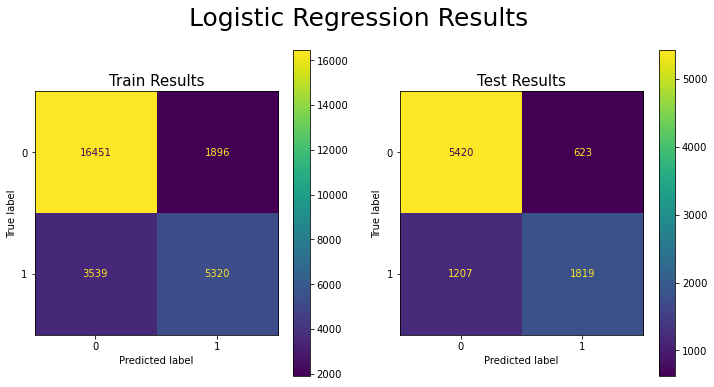

In [36]:
score_model(log_reg, 'Logistic Regression')

## XGBoost

In [41]:
xgb_model = XGBClassifier(random_state=42)

Train Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     18347
           1       0.84      0.78      0.81      8859

    accuracy                           0.88     27206
   macro avg       0.87      0.85      0.86     27206
weighted avg       0.88      0.88      0.88     27206

Test Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6043
           1       0.94      0.90      0.92      3026

    accuracy                           0.95      9069
   macro avg       0.95      0.93      0.94      9069
weighted avg       0.95      0.95      0.95      9069



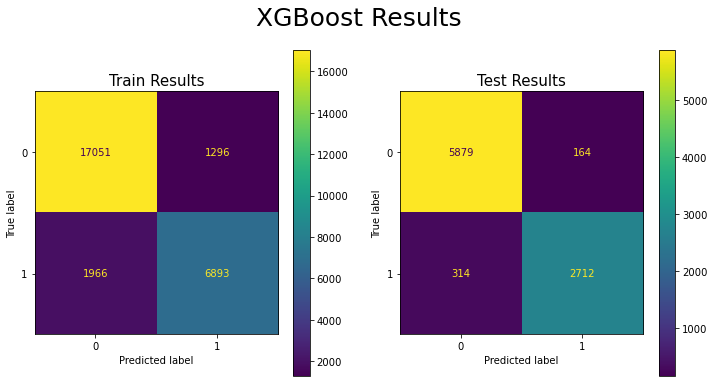

In [49]:
score_model(xgb_model, 'XGBoost', normalize=None)

## Random Forest

In [51]:
rf_model = RandomForestClassifier(random_state=42)

Train Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18347
           1       0.99      0.99      0.99      8859

    accuracy                           0.99     27206
   macro avg       0.99      0.99      0.99     27206
weighted avg       0.99      0.99      0.99     27206

Test Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6043
           1       0.89      0.81      0.85      3026

    accuracy                           0.91      9069
   macro avg       0.90      0.88      0.89      9069
weighted avg       0.91      0.91      0.90      9069



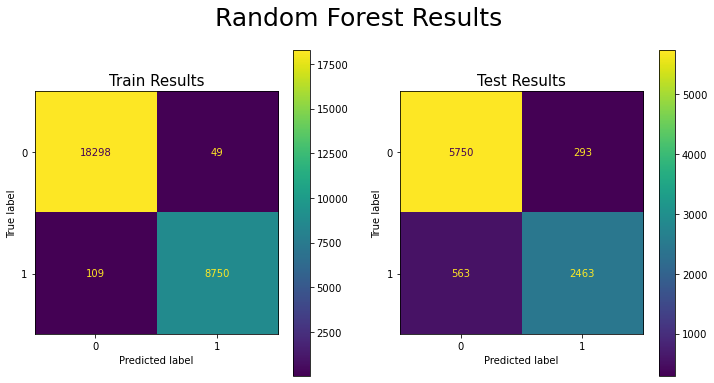

In [52]:
score_model(rf_model, 'Random Forest')

In [53]:
accuracy_score(y_test, xgb_model.predict(X_test))

0.9472929760723343

In [55]:
roc_auc_score(y_test, xgb_model.predict(X_test))

0.9345469060190905